In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('keys.csv')

In [3]:
# get twitter keys
api_key = df['key'][0].strip()
s_key = df['key'][1].strip()
access_token = df['key'][3].strip()
access_token_s = df['key'][4].strip()

In [4]:
# create the authentification object
auth = tweepy.OAuthHandler(api_key, s_key)

# set access token
auth.set_access_token(access_token, access_token_s)

# create the API object
api = tweepy.API(auth, wait_on_rate_limit = True)

In [5]:
# extract 100 tweets from bill G
posts = api.user_timeline(screen_name = 'IvanOnTech', count = 100, lang = 'en', tweet_mode = 'extended')

In [6]:
# create a list for the tweets
lst_tweets = [tweet.full_text for tweet in posts]

# create a list for the time of the tweet
lst_created_at = [tweet.created_at for tweet in posts]

# create the df therefore
df = pd.DataFrame(np.column_stack([lst_tweets, lst_created_at]), columns = ['Tweets', 'Created at'])

# show df
df.head()

,Tweets,Created at
0,@MartiniGuyYT KIING!!,2020-12-08 20:00:04
1,DUMP CONTINUES!!!\n\n$17100 BEARISH TARGET \n\...,2020-12-08 12:40:53
2,@DCLBlogger @SuperRare @makersplaceco @KnownOr...,2020-12-08 12:38:40
3,RT @InjectiveLabs: We are excited to launch So...,2020-12-08 09:54:27
4,Bitcoin breaking down 👀👀 https://t.co/g3nz1agrjn,2020-12-08 09:51:24


In [7]:
# clean the text
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove the @mentions
    text = re.sub(r'#', '', text) # remove the hashtags
    text = re.sub(r'RT[\s]+', '', text) # remove the retweets
    text = re.sub(r'https?:\/\/\S+', '', text) # remove hyperlinks
    
    return text

# appy the function to clean the posts
df['Tweets'] = df['Tweets'].apply(cleanText)

In [8]:
# create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
    
# create two new columns therefore
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# show the df
df

,Tweets,Created at,Subjectivity,Polarity
0,KIING!!,2020-12-08 20:00:04,0.000000,0.000000
1,DUMP CONTINUES!!!\n\n$17100 BEARISH TARGET \n\...,2020-12-08 12:40:53,0.000000,0.000000
2,_io _Pro _Delbo amazing work!!,2020-12-08 12:38:40,0.900000,0.937500
3,: We are excited to launch Solstice V2 🚀\n\nWe...,2020-12-08 09:54:27,0.583333,0.158333
4,Bitcoin breaking down 👀👀,2020-12-08 09:51:24,0.288889,-0.155556
...,...,...,...,...
95,Moral of the saga: buy the dip,2020-11-26 17:01:01,0.250000,0.000000
96,CRYPTO WILL KEEP DUMPING!!!\n\nAND THEN CRAZY ...,2020-11-26 17:00:37,0.900000,-0.937500
97,👏👏,2020-11-26 10:00:02,0.000000,0.000000
98,_Network: Really important trend line to watch...,2020-11-26 09:07:43,0.500000,0.200000


<function matplotlib.pyplot.show(*args, **kw)>

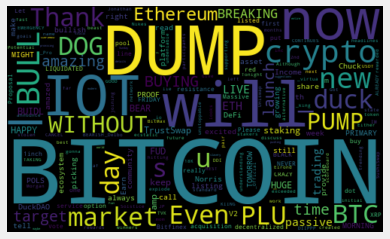

In [9]:
# plot the wordcloud
allWords = ' '.join( [tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [10]:
# create a function to compute the negative, neutral and positiv analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show df
df

,Tweets,Created at,Subjectivity,Polarity,Analysis
0,KIING!!,2020-12-08 20:00:04,0.000000,0.000000,Neutral
1,DUMP CONTINUES!!!\n\n$17100 BEARISH TARGET \n\...,2020-12-08 12:40:53,0.000000,0.000000,Neutral
2,_io _Pro _Delbo amazing work!!,2020-12-08 12:38:40,0.900000,0.937500,Positive
3,: We are excited to launch Solstice V2 🚀\n\nWe...,2020-12-08 09:54:27,0.583333,0.158333,Positive
4,Bitcoin breaking down 👀👀,2020-12-08 09:51:24,0.288889,-0.155556,Negative
...,...,...,...,...,...
95,Moral of the saga: buy the dip,2020-11-26 17:01:01,0.250000,0.000000,Neutral
96,CRYPTO WILL KEEP DUMPING!!!\n\nAND THEN CRAZY ...,2020-11-26 17:00:37,0.900000,-0.937500,Negative
97,👏👏,2020-11-26 10:00:02,0.000000,0.000000,Neutral
98,_Network: Really important trend line to watch...,2020-11-26 09:07:43,0.500000,0.200000,Positive


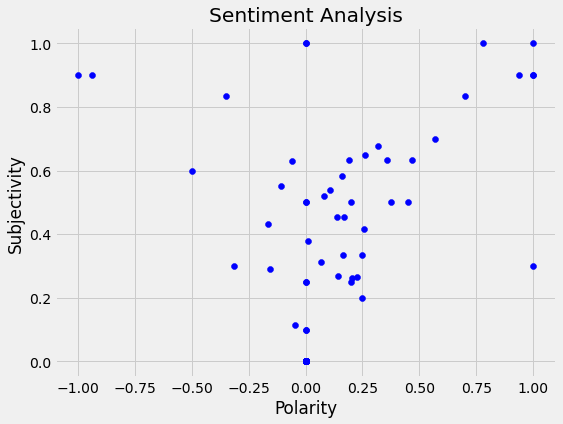

In [11]:
# plot the polarity
plt.figure(figsize = (8, 6))
for i in range(df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

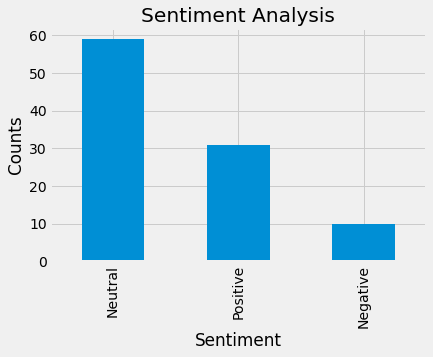

In [12]:
# show the value counts
df['Analysis'].value_counts()

#plot the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [13]:
#create a specific column for the date to the count of tweets per day
df['Created at date'] = [d.date() for d in df['Created at']]

# create a dataframe for that matter
series_count_tweets = df.groupby('Created at date')['Tweets'].count()
df_count_tweets = series_count_tweets.to_frame()
df_count_tweets.rename(columns = {'Tweets':'count Tweets'}, inplace = True)

# show df of tweets per day
df_count_tweets

,count Tweets
Created at date,
2020-11-26,7
2020-11-27,10
2020-11-28,8
2020-11-29,6
2020-11-30,10
2020-12-01,23
2020-12-02,4
2020-12-03,6
2020-12-04,6


In [14]:
#merge the original df with the df_count_tweets 
df = pd.merge(df, df_count_tweets, on = 'Created at date')

In [15]:
# create a function to get dfs with the count of positive, negative and neutral tweets per day
def countPnnTweets(sentiment):
    df_tweets = df[df['Analysis'] == sentiment]
    series_tweets = df_tweets.groupby('Created at date')['Analysis'].count()
    df_tweets_counts = series_tweets.to_frame().rename(columns = {'Analysis' : 'Count ' + sentiment + ' tweets'})
    
    return df_tweets_counts

# create the different dataframes
df_positive_tweets_counts = countPnnTweets('Positive')
df_negative_tweets_counts = countPnnTweets('Negative')
df_neutral_tweets_counts = countPnnTweets('Neutral')

# merge the dataframes
df = pd.merge(df, df_positive_tweets_counts, on = 'Created at date')
df = pd.merge(df, df_negative_tweets_counts, on = 'Created at date')
df = pd.merge(df, df_neutral_tweets_counts, on = 'Created at date')

In [19]:
df

,Tweets,Created at,Subjectivity,Polarity,Analysis,Created at date,count Tweets,Count Positive tweets,Count Negative tweets,Count Neutral tweets
0,KIING!!,2020-12-08 20:00:04,0.000000,0.000000,Neutral,2020-12-08,7,3,1,3
1,DUMP CONTINUES!!!\n\n$17100 BEARISH TARGET \n\...,2020-12-08 12:40:53,0.000000,0.000000,Neutral,2020-12-08,7,3,1,3
2,_io _Pro _Delbo amazing work!!,2020-12-08 12:38:40,0.900000,0.937500,Positive,2020-12-08,7,3,1,3
3,: We are excited to launch Solstice V2 🚀\n\nWe...,2020-12-08 09:54:27,0.583333,0.158333,Positive,2020-12-08,7,3,1,3
4,Bitcoin breaking down 👀👀,2020-12-08 09:51:24,0.288889,-0.155556,Negative,2020-12-08,7,3,1,3
...,...,...,...,...,...,...,...,...,...,...
66,Moral of the saga: buy the dip,2020-11-26 17:01:01,0.250000,0.000000,Neutral,2020-11-26,7,1,1,5
67,CRYPTO WILL KEEP DUMPING!!!\n\nAND THEN CRAZY ...,2020-11-26 17:00:37,0.900000,-0.937500,Negative,2020-11-26,7,1,1,5
68,👏👏,2020-11-26 10:00:02,0.000000,0.000000,Neutral,2020-11-26,7,1,1,5
69,_Network: Really important trend line to watch...,2020-11-26 09:07:43,0.500000,0.200000,Positive,2020-11-26,7,1,1,5


In [20]:
# get time and price data for the coin of your choice
from pycoingecko import CoinGeckoAPI
from datetime import datetime

def getCryptoData(coin):
    # define coingecko object
    cg = CoinGeckoAPI()
    
    # get the price and the timevalues for Bitcoin
    coin_data = cg.get_coin_market_chart_by_id(id = coin, vs_currency = 'usd', days = 30)
    
    # transfrom the timevalues and create the lists for time and price for Bitcoin
    lst_coin_data_time = [datetime.fromtimestamp(x[0] / 1000) for x in coin_data['prices']]
    lst_coin_data_price = [x[1] for x in coin_data['prices']]
    
    # create the dataframe for the price and timevalues for Bitcoin
    df = pd.DataFrame(np.column_stack([lst_coin_data_time, lst_coin_data_price]),
                  columns = [str(coin) + 'Time', str(coin) + 'BTC Price'])
    
    return df

btc = getCryptoData('bitcoin')